In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np

In [55]:
#生成词云
def create_word_cloud(f): 
    print('根据词频计算词云') 
    text = " ".join(jieba.cut(f,cut_all=False, HMM=True)) 
    wc = WordCloud( font_path="./data/word_cloud-master/SimHei.ttf", max_words=100, width=2000, height=1200, ) 
    wordcloud = wc.generate(text) 
    # 写词云图片 
    wordcloud.to_file("./data/word_cloud-master/wordcloud1.jpg") 
    # 显示词云文件 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.show()
f = '数据分析全景图及修炼指南\学习数据挖掘的最佳学习路径是什么？\Python基础语法：开始你的Python之旅\Python科学计算：NumPy\Python科学计算：Pandas\学习数据分析要掌握哪些基本概念？\用户画像：标签化就是数据的抽象能力\数据采集：如何自动化采集数据？\数据采集：如何用八爪鱼采集微博上的“D&G”评论？\Python爬虫：如何自动化下载王祖贤海报？\数据清洗：数据科学家80%时间都花费在了这里？\数据集成：这些大号一共20亿粉丝？\数据变换：大学成绩要求正态分布合理么？\数据可视化：掌握数据领域的万金油技能\一次学会Python数据可视化的10种技能'

根据词频计算词云


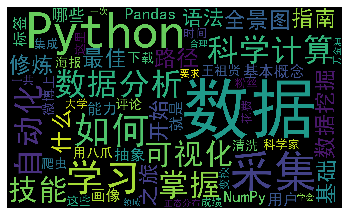

In [56]:
create_word_cloud(f)

In [57]:
text = " ".join(jieba.cut(f,))
text

'数据分析 全景图 及 修炼 指南 \\ 学习 数据挖掘 的 最佳 学习 路径 是 什么 ？ \\ Python 基础 语法 ： 开始 你 的 Python 之旅 \\ Python 科学计算 ： NumPy \\ Python 科学计算 ： Pandas \\ 学习 数据分析 要 掌握 哪些 基本概念 ？ \\ 用户 画像 ： 标签 化 就是 数据 的 抽象 能力 \\ 数据 采集 ： 如何 自动化 采集 数据 ？ \\ 数据 采集 ： 如何 用八爪 鱼 采集 微博上 的 “ D & G ” 评论 ？ \\ Python 爬虫 ： 如何 自动化 下载 王祖贤 海报 ？ \\ 数据 清洗 ： 数据 科学家 80% 时间 都 花费 在 了 这里 ？ \\ 数据 集成 ： 这些 大 号 一共 20 亿 粉丝 ？ \\ 数据 变换 ： 大学 成绩 要求 正态分布 合理 么 ？ \\ 数据 可视化 ： 掌握 数据 领域 的 万金油 技能 \\ 一次 学会 Python 数据 可视化 的 10 种 技能'

In [58]:
wc = WordCloud(font_path='./data/word_cloud-master/wc.ttf',width=1200,height=800)

In [59]:
wordimg = wc.generate(text)

(-0.5, 1199.5, 799.5, -0.5)

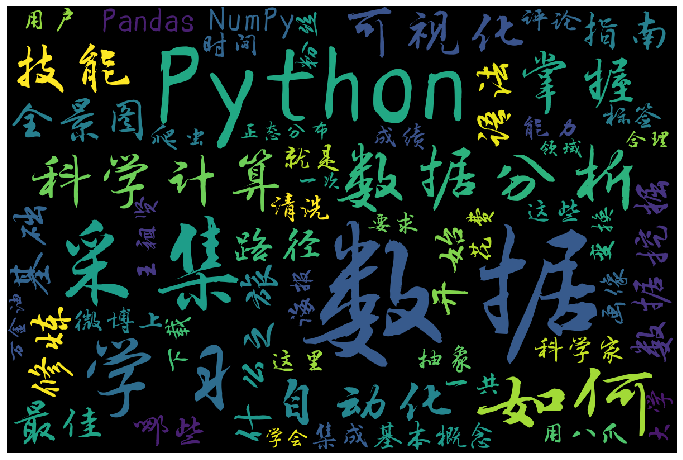

In [60]:
plt.figure(figsize=(12,12))
plt.imshow(wordimg)
plt.axis("off") # 关闭坐标轴的显示

## 毛不易的歌词词云

In [61]:
import requests
import sys
import re
import os
from lxml import etree

In [62]:
# 得到指定歌手页面 热门前50的歌曲ID，歌曲名
def get_songs(artist_id):
	page_url = 'https://music.163.com/artist?id=' + artist_id
	# 获取网页HTML
	res = requests.request('GET', page_url, headers=headers)
	# 用XPath解析 前50首热门歌曲
	html = etree.HTML(res.text)
	href_xpath = "//*[@id='hotsong-list']//a/@href"
	name_xpath = "//*[@id='hotsong-list']//a/text()"
	hrefs = html.xpath(href_xpath)
	names = html.xpath(name_xpath)
	# 设置热门歌曲的ID，歌曲名称
	song_ids = []
	song_names = []
	for href, name in zip(hrefs, names):
		song_ids.append(href[9:])
		song_names.append(name)
		print(href, '  ', name)
	return song_ids, song_names

In [63]:
# 设置歌手ID，毛不易为12138269
artist_id = '12138269'
song_ids, song_names = get_songs(artist_id)

/song?id=569213220    像我这样的人
/song?id=569214250    借
/song?id=569200213    消愁
/song?id=536099160    不染
/song?id=1449782341    入海
/song?id=525278524    无问
/song?id=569214247    平凡的一天
/song?id=569200212    一荤一素
/song?id=1417862046    呓语
/song?id=569212211    盛夏
/song?id=569200210    给你给我
/song?id=1407214788    二零三
/song?id=1417856017    小王
/song?id=1417849873    一程山路
/song?id=1411558182    东北民谣
/song?id=569214252    如果有一天我变得很有钱
/song?id=569212210    想你想你
/song?id=1440876696    深夜一角 (Live)
/song?id=1413304559    胡同
/song?id=1408763442    水乡
/song?id=1421191830    借 (Live)
/song?id=1417862065    小王日记
/song?id=569200211    哎哟
/song?id=1417849885    等
/song?id=524913480    感觉自己是巨星
/song?id=569214249    南一道街
/song?id=569214251    芬芳一生
/song?id=1383923446    17
/song?id=518088247    项羽虞姬
/song?id=1417723811    红莓花儿开
/song?id=1313052960    从无到有
/song?id=862098671    意料之中
/song?id=1306496991    一江水
/song?id=1325897605    那时的我们
/song?id=519250015    请记住我
/song?id=1332490992    在无风时
/song?id=14178

In [64]:
# 得到某一首歌的歌词
def get_song_lyric(headers, lyric_url):
	res = requests.request('GET', lyric_url, headers=headers)
	if 'lrc' in res.json():
		lyric = res.json()['lrc']['lyric']
		new_lyric = re.sub(r'[\d:.[\]]','',lyric)
		return new_lyric
	else:
		return ''
		print(res.json())

In [65]:
# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
	# 歌词API URL
	lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
	lyric = get_song_lyric(headers, lyric_url)
	all_word = all_word + ' ' + lyric


In [66]:
all_word

'  作曲  毛不易\n 作词  毛不易\n编曲Arranger  赵兆 宋涛\n\n像我这样优秀的人\n本该灿烂过一生\n怎么二十多年到头来\n还在人海里浮沉\n\n像我这样聪明的人\n早就告别了单纯\n怎么还是用了一段情\n去换一身伤痕\n\n像我这样迷茫的人\n像我这样寻找的人\n像我这样碌碌无为的人\n你还见过多少人\n\n像我这样庸俗的人\n从不喜欢装深沉\n怎么偶尔听到老歌时\n忽然也晃了神\n像我这样懦弱的人\n凡事都要留几分\n怎么曾经也会为了谁\n想过奋不顾身\n\n像我这样迷茫的人\n像我这样寻找的人\n像我这样碌碌无为的人\n你还见过多少人\n\n像我这样孤单的人\n像我这样傻的人\n像我这样不甘平凡的人\n世界上有多少人\n\n像我这样迷茫的人\n像我这样寻找的人\n像我这样碌碌无为的人\n你还见过多少人\n\n像我这样孤单的人\n像我这样傻的人\n像我这样不甘平凡的人\n世界上有多少人\n\n像我这样莫名其妙的人\n会不会有人心疼\n\n制作人Producer  李健 赵兆\n口琴Harmonica  刘晓光\n键盘Keyboard  赵兆\n吉他Guitar  薛峰\n贝斯Bass  韩阳\n鼓Drum  武勇恒\n弦乐Strings  国际首席爱乐乐团International Master Philharmonic Orchestra\n混音Mixing  周天澈\n母带Mastering  Joe LaPorta （Sterling Sound NY）\n录音棚Studio  TEC  Beijing\n录音Recording  李游 李杨\n人声录音Vocal Recording  李杨\n人声编辑Vocal Editing  李杨\n录音助理Recording Assistants  郭舒文 邢铜\n音乐制作发行produced and distributed  哇唧唧哇×智慧大狗\n\n  作曲  毛不易\n 作词  毛不易\n编曲Arranger ：赵兆 宋涛\n\n借一盏午夜街头 昏黄灯光\n照亮那坎坷路上人影一双\n借一寸三九天里 冽冽暖阳\n融这茫茫人间刺骨凉\n借一泓古老河水 九曲回肠\n带着那摇晃烛火 漂往远方\n借一段往日旋律 婉转悠扬\n把这不能说的轻轻唱\n被这风吹散的人说他爱得不深\n被这雨淋湿的人说他不会

In [67]:
# 生成词云
def create_word_cloud(f):
	print('根据词频，开始生成词云!')
	f = remove_stop_words(f)
	cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
	wc = WordCloud(
		font_path="./data/word_cloud-master/wc.ttf",
		max_words=100,
		width=2000,
		height=1200,
    )
	print(cut_text)
	wordcloud = wc.generate(cut_text)
	# 写词云图片
	wordcloud.to_file("./data/word_cloud-master/wordcloud2.jpg")
	# 显示词云文件
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.show()

根据词频，开始生成词云!
        毛 不易 
       毛 不易 
     赵兆   宋涛 
 
 像 我 这样 优秀 的 人 
 本该 灿烂 过 一生 
 怎么 二十多年 到头来 
 还 在 人 海里 浮沉 
 
 像 我 这样 聪明 的 人 
 早就 告别 了 单纯 
 怎么 还是 用 了 一段 情 
 去 换 一身 伤痕 
 
 像 我 这样 迷茫 的 人 
 像 我 这样 寻找 的 人 
 像 我 这样 碌碌无为 的 人 
 你 还 见 过 多少 人 
 
 像 我 这样 庸俗 的 人 
 从不 喜欢 装 深沉 
 怎么 偶尔 听到 老歌 时 
 忽然 也 晃 了 神 
 像 我 这样 懦弱 的 人 
 凡事 都 要 留 几分 
 怎么 曾经 也 会 为了 谁 
 想过 奋不顾身 
 
 像 我 这样 迷茫 的 人 
 像 我 这样 寻找 的 人 
 像 我 这样 碌碌无为 的 人 
 你 还 见 过 多少 人 
 
 像 我 这样 孤单 的 人 
 像 我 这样 傻 的 人 
 像 我 这样 不甘 平凡 的 人 
 世界 上 有 多少 人 
 
 像 我 这样 迷茫 的 人 
 像 我 这样 寻找 的 人 
 像 我 这样 碌碌无为 的 人 
 你 还 见 过 多少 人 
 
 像 我 这样 孤单 的 人 
 像 我 这样 傻 的 人 
 像 我 这样 不甘 平凡 的 人 
 世界 上 有 多少 人 
 
 像 我 这样 莫名其妙 的 人 
 会 不会 有人 心疼 
 
 人     李健   赵兆 
 口琴 Harmonica     刘晓光 
     赵兆 
 吉他 Guitar     薛峰 
 贝斯 Bass     韩阳 
 鼓 Drum     武勇恒 
 Strings     国际 首席 爱乐乐团 International   Master   Philharmonic   Orchestra 
     周天 澈 
 母带 Mastering     Joe   LaPorta   （ Sterling   Sound   NY ） 
 棚 Studio     TEC     Beijing 
     李游   李杨 
       李杨 
       李杨 
       郭舒文   邢铜 
         哇

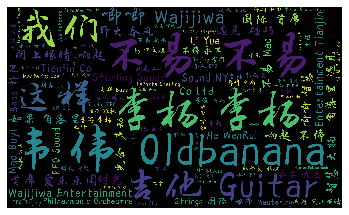

In [68]:
create_word_cloud(all_word)